In [1]:
import numpy as np
import time
import gc

In [2]:
from models.bayesian_autoencoder import BayesianAutoencoder

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
# uses gradient clipping
# 10 mc samples
n_inputs = 784
n_neurons_encoder = [256, 128]
n_latent = 2
n_neurons_decoder = [128, 256]
vi = BayesianAutoencoder('BAE_256_128_2',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.01, epochs=50)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

(?,)
   [49.2] Epoch: 01 | NELBO: 133605193.678322 | ELL: -2429.185244 | KL: 5.855408 | Val. ELL: -1163.989414
   [45.4] Epoch: 02 | NELBO: 52755729.305361 | ELL: -959.195005 | KL: 4.990091 | Val. ELL: -785.335369
   [45.1] Epoch: 03 | NELBO: 37151815.645688 | ELL: -675.487483 | KL: 4.716443 | Val. ELL: -593.278469
   [44.3] Epoch: 04 | NELBO: 29446593.020979 | ELL: -535.392528 | KL: 4.396612 | Val. ELL: -479.962522
   [44.9] Epoch: 05 | NELBO: 24011699.487179 | ELL: -436.576282 | KL: 4.277844 | Val. ELL: -400.084627
   [44.7] Epoch: 06 | NELBO: 20270771.403263 | ELL: -368.559407 | KL: 4.142425 | Val. ELL: -341.580315
   [44.9] Epoch: 07 | NELBO: 17276037.205128 | ELL: -314.109692 | KL: 4.283012 | Val. ELL: -276.508370
   [45.0] Epoch: 08 | NELBO: 13830021.703963 | ELL: -251.454852 | KL: 4.619431 | Val. ELL: -232.893039
   [44.5] Epoch: 09 | NELBO: 12164146.331002 | ELL: -221.166206 | KL: 4.841606 | Val. ELL: -211.499467
   [44.9] Epoch: 10 | NELBO: 11253973.825175 | ELL: -204.617615 |

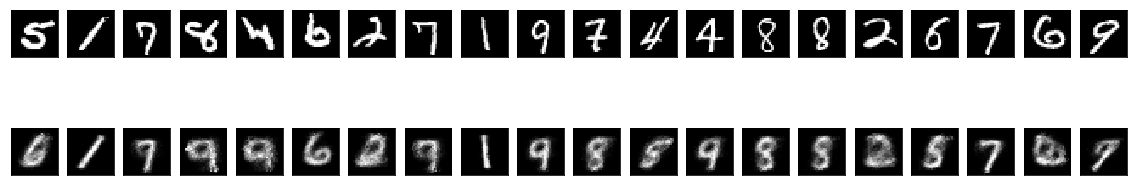

In [7]:
vi.plot_enc_dec(20, save=True)

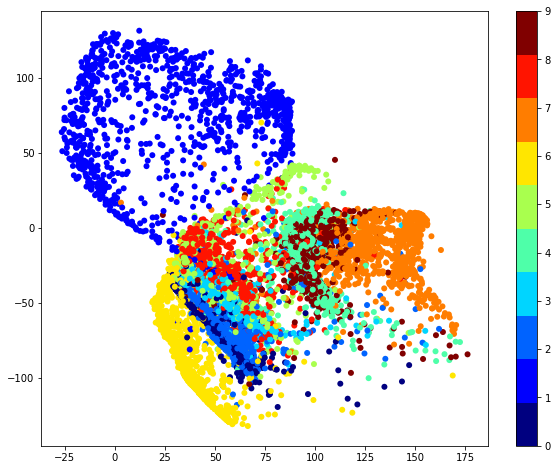

In [8]:
vi.plot_latent_repr(save=True)

In [9]:
xs, ys = mnist.test.next_batch(100)
zs = vi.session.run(vi.z_exp, feed_dict={vi.X: xs, vi.L: 1})
print(zs[0].max())
print(zs[0].min())
print(zs[1].max())
print(zs[1].min())

40.4537
-63.9709
93.3528
5.25244


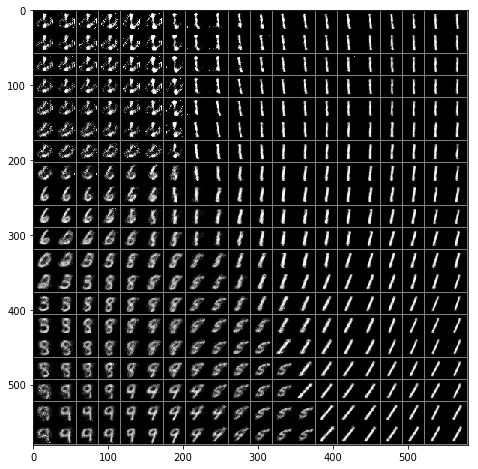

In [19]:
vi.plot_latent_recon(min_val=-50, max_val=100, save=True)

In [4]:
# 1 sample
# uses gradient clipping
n_inputs = 784
n_neurons_encoder = [256, 128]
n_latent = 2
n_neurons_decoder = [128, 256]
vi = BayesianAutoencoder('BAE_simple',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.01, epochs=100)

   [29.9] Epoch: 01 | NELBO: 178157646.545455 | ELL: -3239.229883 | KL: 5.574961 | Val. ELL: -1621.763559
   [33.8] Epoch: 02 | NELBO: 92459751.048951 | ELL: -1681.086292 | KL: 4.133606 | Val. ELL: -1793.923687
   [32.7] Epoch: 03 | NELBO: 96475459.132867 | ELL: -1754.099253 | KL: 3.680408 | Val. ELL: -1768.654491
   [32.0] Epoch: 04 | NELBO: 95918680.634033 | ELL: -1743.976014 | KL: 3.406583 | Val. ELL: -1692.834294
   [36.8] Epoch: 05 | NELBO: 90418390.694639 | ELL: -1643.970738 | KL: 3.414444 | Val. ELL: -1581.924557
   [36.4] Epoch: 06 | NELBO: 85434408.093240 | ELL: -1553.352875 | KL: 3.409338 | Val. ELL: -1516.886481
   [35.4] Epoch: 07 | NELBO: 79498944.932401 | ELL: -1445.435360 | KL: 3.317308 | Val. ELL: -1419.218975
   [41.2] Epoch: 08 | NELBO: 74118999.207459 | ELL: -1347.618167 | KL: 3.536646 | Val. ELL: -1308.652422
   [38.9] Epoch: 09 | NELBO: 68489558.414918 | ELL: -1245.264668 | KL: 3.515857 | Val. ELL: -1226.793601
   [37.1] Epoch: 10 | NELBO: 64571862.853147 | ELL: -1

   [32.5] Epoch: 81 | NELBO: 9851125.135198 | ELL: -179.111048 | KL: 17.470954 | Val. ELL: -178.205701
   [32.6] Epoch: 82 | NELBO: 9844106.254079 | ELL: -178.983381 | KL: 20.320548 | Val. ELL: -179.219450
   [32.5] Epoch: 83 | NELBO: 9812540.955711 | ELL: -178.409466 | KL: 20.322190 | Val. ELL: -175.834464
   [33.8] Epoch: 84 | NELBO: 9798920.319347 | ELL: -178.161799 | KL: 21.378026 | Val. ELL: -177.021093
   [32.7] Epoch: 85 | NELBO: 9752042.776224 | ELL: -177.309463 | KL: 22.302402 | Val. ELL: -176.628397
   [32.3] Epoch: 86 | NELBO: 9702493.433566 | ELL: -176.408543 | KL: 23.567424 | Val. ELL: -172.695326
   [32.2] Epoch: 87 | NELBO: 9688559.890443 | ELL: -176.155175 | KL: 25.281875 | Val. ELL: -173.089084
   [32.8] Epoch: 88 | NELBO: 9692201.692308 | ELL: -176.221393 | KL: 25.077215 | Val. ELL: -174.850962
   [32.1] Epoch: 89 | NELBO: 9625166.132867 | ELL: -175.002535 | KL: 26.673350 | Val. ELL: -170.836180
   [35.0] Epoch: 90 | NELBO: 9565145.778555 | ELL: -173.911239 | KL: 27.6

In [5]:
# 10 samples
# uses gradient clipping
n_inputs = 784
n_neurons_encoder = []
n_latent = 32
n_neurons_decoder = []
vi = BayesianAutoencoder('BAE_32',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.01, epochs=30)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

   [21.5] Epoch: 01 | NELBO: 131510808.484848 | ELL: -2391.105613 | KL: 0.877097 | Val. ELL: -1488.665521
   [19.9] Epoch: 02 | NELBO: 67463313.090909 | ELL: -1226.605681 | KL: 1.395285 | Val. ELL: -970.347633
   [18.9] Epoch: 03 | NELBO: 42777987.995338 | ELL: -777.781570 | KL: 2.107679 | Val. ELL: -541.609013
   [20.9] Epoch: 04 | NELBO: 19522587.116550 | ELL: -354.956065 | KL: 3.452004 | Val. ELL: -234.680851
   [21.7] Epoch: 05 | NELBO: 10279642.952214 | ELL: -186.902501 | KL: 5.409901 | Val. ELL: -152.617446
   [23.1] Epoch: 06 | NELBO: 7432607.917249 | ELL: -135.138170 | KL: 8.567473 | Val. ELL: -120.399535
   [23.2] Epoch: 07 | NELBO: 6163048.958042 | ELL: -112.055182 | KL: 13.968693 | Val. ELL: -104.612634
   [22.0] Epoch: 08 | NELBO: 5476218.214452 | ELL: -99.567218 | KL: 21.205284 | Val. ELL: -94.913964
   [24.3] Epoch: 09 | NELBO: 5112587.353147 | ELL: -92.955327 | KL: 44.389651 | Val. ELL: -90.049248
   [22.9] Epoch: 10 | NELBO: 4886395.152681 | ELL: -88.842161 | KL: 76.336

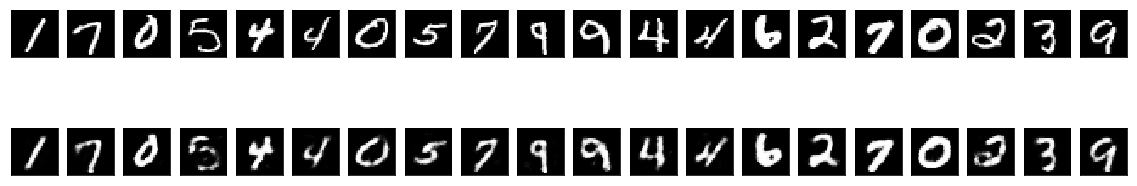

In [10]:
vi.plot_enc_dec(20, save=True)
# vi.plot_latent_repr()
# vi.plot_latent_recon(min_val=-85, max_val=170)

In [ ]:
148

In [5]:
# 10 samples
# uses gradient clipping
n_inputs = 784
n_neurons_encoder = [128, 64]
n_latent = 2
n_neurons_decoder = [64, 128]
vi = BayesianAutoencoder('BAE_128_64_2',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.01, epochs=30)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

   [123.5] Epoch: 01 | NELBO: 16151989.270396 | ELL: -293.672505 | KL: 1.738715 | Val. ELL: -211.612179
   [125.8] Epoch: 02 | NELBO: 11059038.575758 | ELL: -201.073396 | KL: 1.936301 | Val. ELL: -5906.175518
   [128.6] Epoch: 03 | NELBO: 10028571.249417 | ELL: -182.337608 | KL: 2.769837 | Val. ELL: -4986.569574
   [131.6] Epoch: 04 | NELBO: 9210184.265734 | ELL: -167.457836 | KL: 3.252716 | Val. ELL: -4661.057091
   [128.5] Epoch: 05 | NELBO: 8883869.339161 | ELL: -161.524838 | KL: 3.244163 | Val. ELL: -5105.960149
   [129.7] Epoch: 06 | NELBO: 8640183.296037 | ELL: -157.094182 | KL: 3.398007 | Val. ELL: -5238.861616
   [127.1] Epoch: 07 | NELBO: 8501170.592075 | ELL: -154.566668 | KL: 3.865814 | Val. ELL: -5394.467085
   [124.8] Epoch: 08 | NELBO: 8419817.611888 | ELL: -153.087501 | KL: 5.016449 | Val. ELL: -5615.002880
   [126.0] Epoch: 09 | NELBO: 8358090.251748 | ELL: -151.965137 | KL: 7.741575 | Val. ELL: -5595.445050
   [126.8] Epoch: 10 | NELBO: 8304238.787879 | ELL: -150.98588

KeyboardInterrupt: 

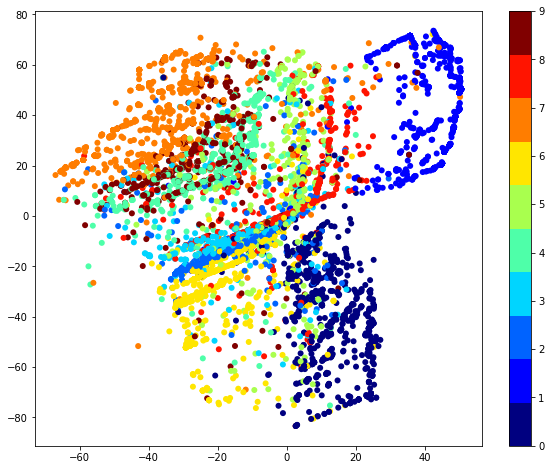

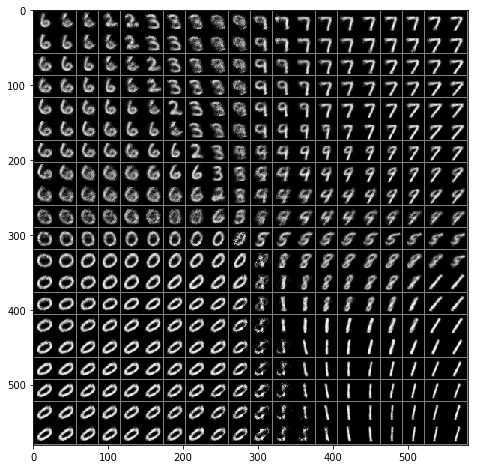

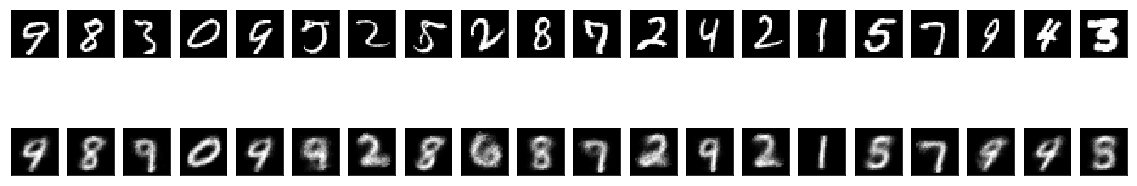

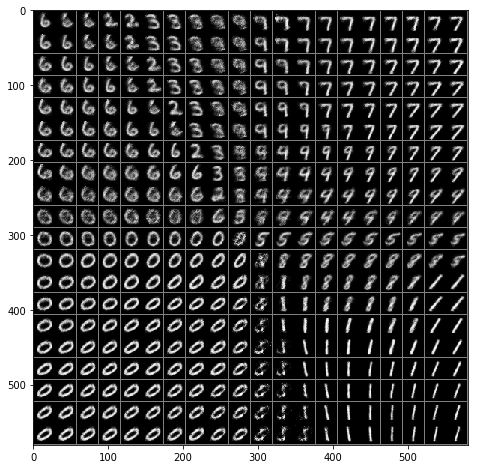

In [15]:
vi.plot_enc_dec(20, save=True)
vi.plot_latent_repr(save=True)
vi.plot_latent_recon(min_val=-70, max_val=70, save=True)

In [6]:
# 10 samples
# uses gradient clipping
n_inputs = 784
n_neurons_encoder = [128, 64]
n_latent = 32
n_neurons_decoder = [64, 128]
vi = BayesianAutoencoder('BAE_128_64_32',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)
vi.learn(learning_rate=0.01, epochs=30)
print('Test Log-Likelihood: %.6f' % vi.benchmark())

   [102.4] Epoch: 01 | NELBO: 71809483.263403 | ELL: -1305.626932 | KL: 2.601719 | Val. ELL: -448.767370
   [107.3] Epoch: 02 | NELBO: 18447523.673660 | ELL: -335.409485 | KL: 2.158239 | Val. ELL: -267.435525
   [102.7] Epoch: 03 | NELBO: 13375249.013986 | ELL: -243.186310 | KL: 1.996612 | Val. ELL: -227.647014
   [101.6] Epoch: 04 | NELBO: 12138679.557110 | ELL: -220.703228 | KL: 1.900097 | Val. ELL: -216.262227
   [101.7] Epoch: 05 | NELBO: 11754264.310023 | ELL: -213.713860 | KL: 1.905649 | Val. ELL: -210.854243
   [103.7] Epoch: 06 | NELBO: 10989547.780886 | ELL: -199.809923 | KL: 2.186795 | Val. ELL: -194.705505
   [102.6] Epoch: 07 | NELBO: 10539389.428904 | ELL: -191.625226 | KL: 2.243791 | Val. ELL: -188.318110
   [105.8] Epoch: 08 | NELBO: 10038597.062937 | ELL: -182.519909 | KL: 2.359070 | Val. ELL: -177.750373
   [103.3] Epoch: 09 | NELBO: 9666114.016317 | ELL: -175.747491 | KL: 2.355185 | Val. ELL: -172.599798
   [104.2] Epoch: 10 | NELBO: 9437478.720280 | ELL: -171.590480 

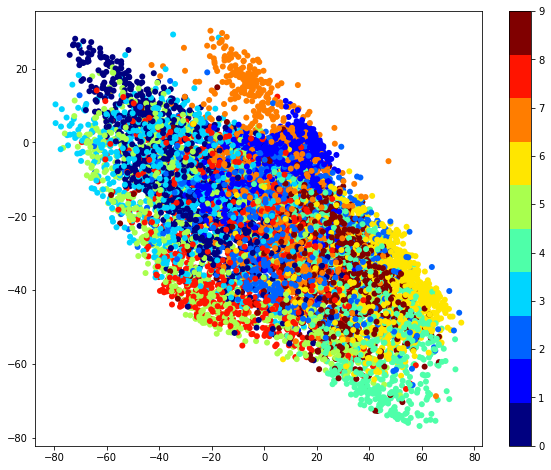

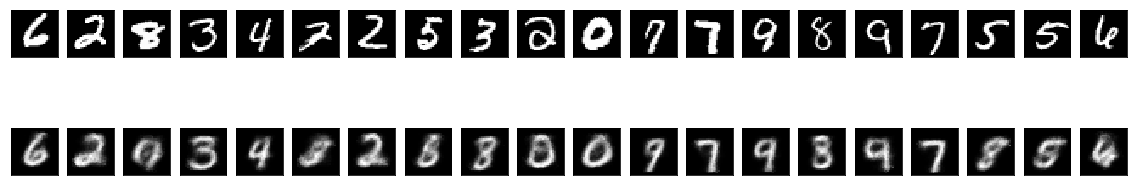

In [8]:
vi.plot_enc_dec(20, save=True)

In [11]:
vi.serialize('DUMPS/bae-simple/model.ckpt')

Model saved in file: DUMPS/bae-simple/model.ckpt


In [5]:
n_inputs = 784
n_neurons_encoder = [256, 128]
n_latent = 2
n_neurons_decoder = [128, 256]

vi = BayesianAutoencoder('BAE_256_128_2',
                         n_inputs,
                         n_neurons_encoder,
                         n_latent,
                         n_neurons_decoder,
                         constant_prior=False)

vi.restore('DUMPS/bae-simple/model.ckpt')

INFO:tensorflow:Restoring parameters from DUMPS/bae-simple/model.ckpt


### Results with [784, 128, 64, 2, 64, 128, 784] architecture and 100 epochs (converged)

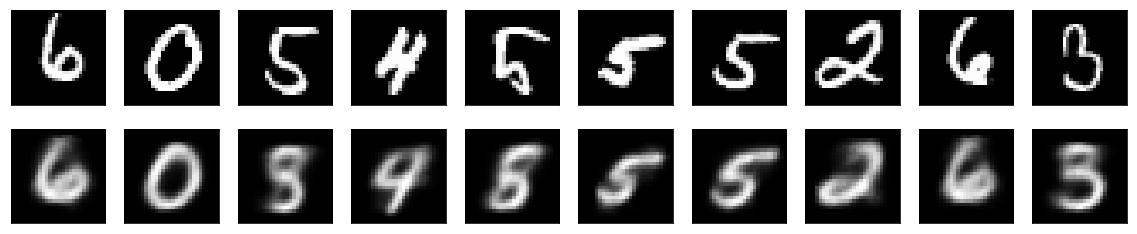

In [8]:
plot_enc_dec()

### Results with [784, 128, 64, 32, 64, 128, 784] architecture and 100 epochs (converged)

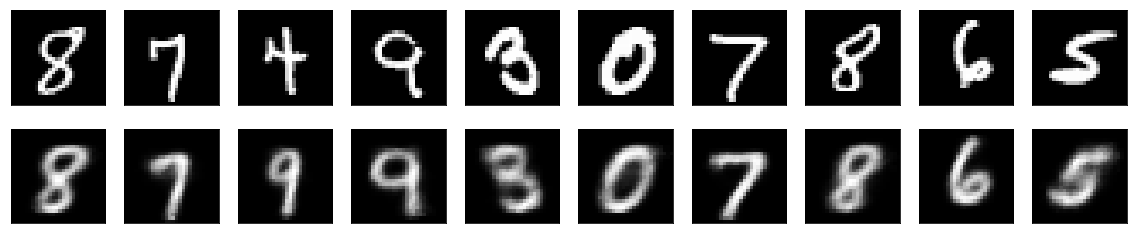

In [9]:
plot_enc_dec()

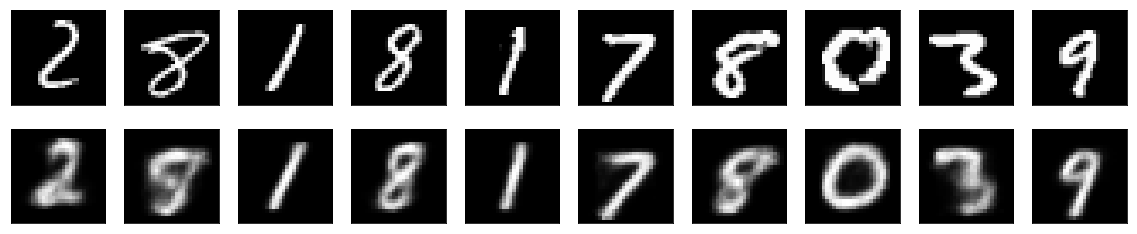

In [10]:
plot_enc_dec()

### Results with [784, 32, 784] architecture and 100 epochs (converged)

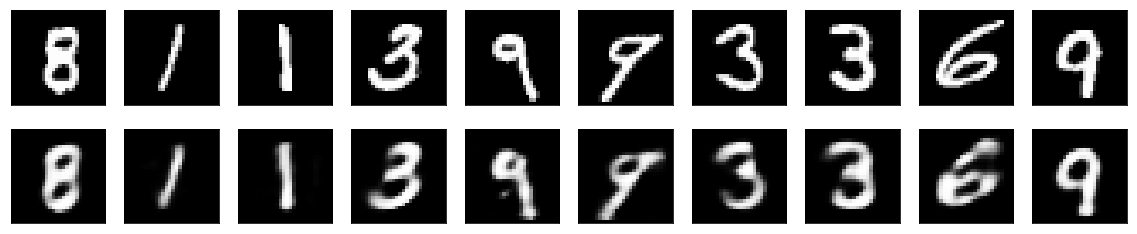

In [11]:
plot_enc_dec()

## Bayesian Autoencoder [784, 32, 784]

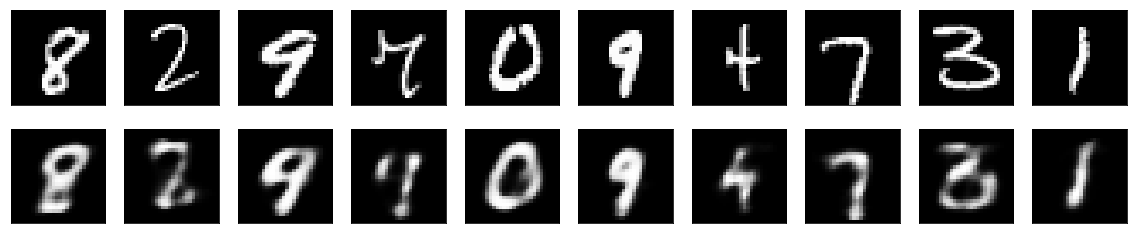

In [7]:
vi.plot_enc_dec(10)

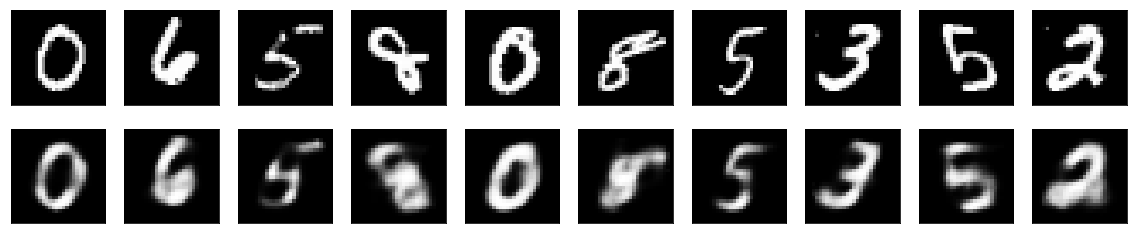

In [8]:
vi.plot_enc_dec(10)

## Bayesian Autoencoder [784, 256, 128, 2, 128, 256, 784]

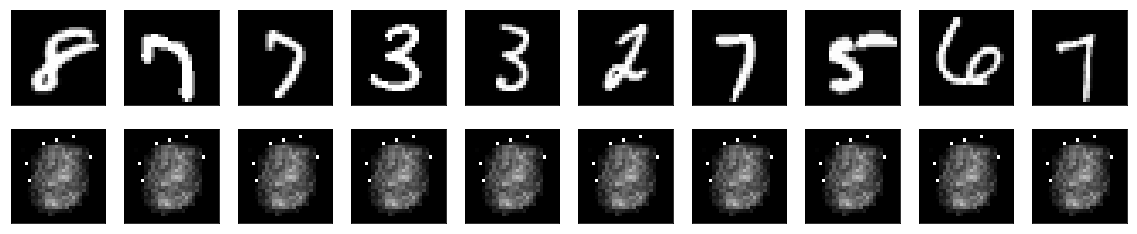

In [9]:
vi.plot_enc_dec(10)

## Bayesian Autoencoder [784, 128, 64, 2, 64, 128, 784]

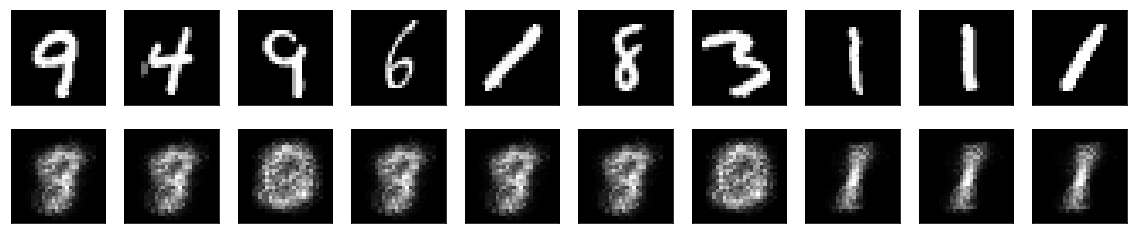

In [7]:
vi.plot_enc_dec(10)

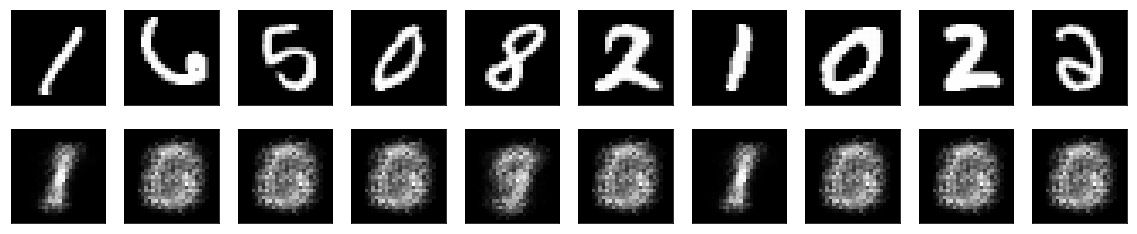

In [8]:
vi.plot_enc_dec(10)

## Bayesian Autoencoder [784, 128, 64, 32, 64, 128, 784]

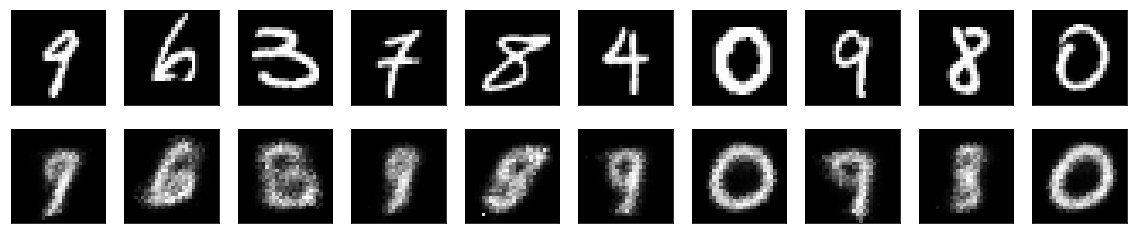

In [6]:
vi.plot_enc_dec(10)

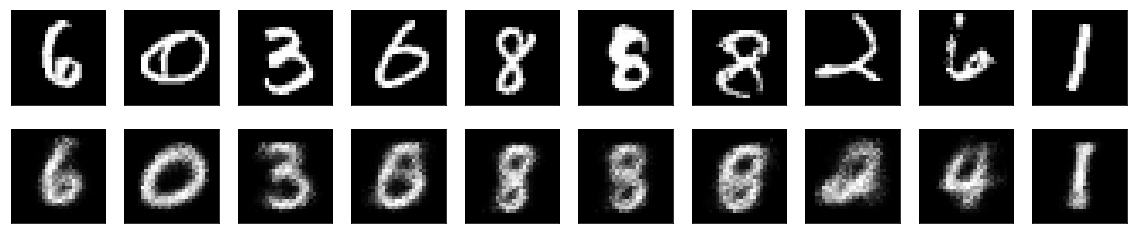

In [11]:
vi.plot_enc_dec(10)